In [38]:
import numpy as np
import matplotlib.pyplot as plt 
from performance_simulation import *

In [ ]:
#General parameters
dt = 15
time = 261
initial_capital = 1000


#Simulation parameters
yearly_return = 1.07

daily_return = 1.001
daily_loss = 1 - 0.01

gain_phase = 0.7
loss_phase = 1 - gain_phase

mode = "constant_timesteps"
#mode = "constant_gain"


#Swing tade parameters
trades = 20
max_trades = 125
hold_time = 20
time_after_reversel = 0
smooth_period = 3

trade_coast = 1
spread = 0.002


sim = ChartSimulation(yearly_return=yearly_return, daily_return=daily_return, daily_loss=daily_loss, gain_phase=gain_phase, loss_phase=loss_phase, mode=mode, 
                      initial_capital=initial_capital, dt=dt, time=time, 
                      trades=trades, max_trades=max_trades, hold_time=hold_time, time_after_reversel=time_after_reversel, smooth_period=smooth_period, trade_coast=trade_coast, spread=spread)

performance, phase = sim.simulate_performance()

random_swing_performance_analyse, trade_dates_random  = sim.random_swing_trade_ana(data=performance)
swing_performance_analyse, trade_dates = sim.swing_trade_ana(data=performance)

sim.print_parameters()
sim.print_results()


Simulation parameters: 

Yearly return:  1.07
Daily return:  1.001
Daily loss:  0.99
Gain phase:  0.9330060842197375
Loss phase:  0.06699391578026248


Swing trade parameters: 

Max trades:  125
Trades:  20
Hold time:  20
Time after reversel:  0
Trade coast:  1
Spread:  0.002


Buy and hold return:  1099.7930702308863
Random swing trade return analyse:  939.8662793070988
Swing trade return analyse:  1041.1136135918653
Best return:  1278.7423833462885


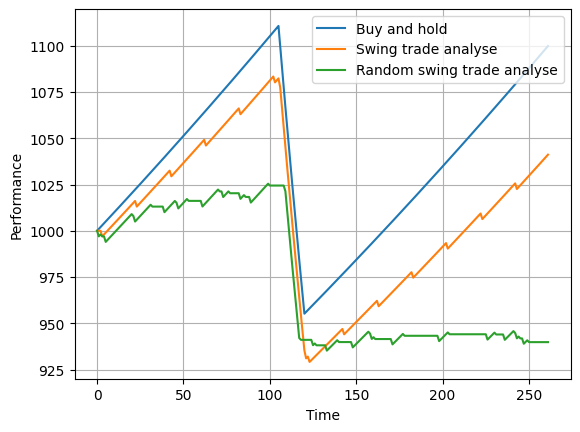

In [40]:
plt.plot(performance, label="Buy and hold")
plt.plot(swing_performance_analyse, label="Swing trade analyse")
plt.plot(random_swing_performance_analyse, label="Random swing trade analyse")
#plt.axhline(1, color="black", linestyle="--")   

plt.xlabel("Time")
plt.ylabel("Performance")

plt.grid()
plt.legend()

#plt.yscale("log")

plt.show()

In [41]:
mc = MonteCarloSimulation(chartsim=sim)
_ = mc.mc_artificial_chart(n=2500)

  0%|          | 0/2500 [00:00<?, ?it/s]

100%|██████████| 2500/2500 [00:29<00:00, 84.67it/s]


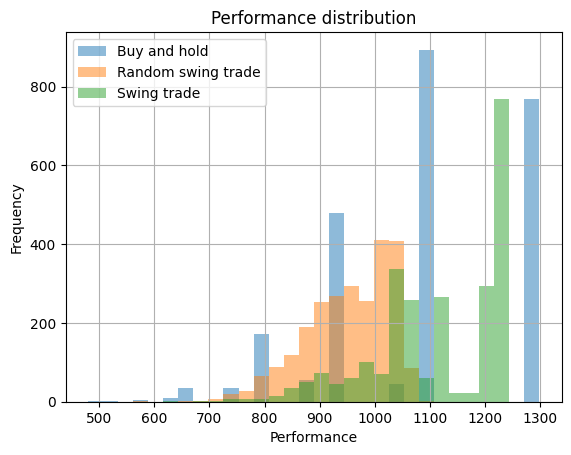

Parameters of ChartSimulation:

Simulation parameters: 

Yearly return:  1.07
Daily return:  1.001
Daily loss:  0.99
Gain phase:  0.9330060842197375
Loss phase:  0.06699391578026248


Swing trade parameters: 

Max trades:  125
Trades:  20
Hold time:  20
Time after reversel:  0
Trade coast:  1
Spread:  0.002




Buy and hold return: 1086.481 +/- 176.745
Random swing trade return: 951.842 +/- 77.758
Swing trade return: 1113.182 +/- 115.393


In [42]:
mc.hist_performance(bins=30)
mc.print_results(accuracy=3)